<a href="https://colab.research.google.com/github/ogulcanakca/ML-Project-LDA-KNN/blob/main/DataScience_ML_LDA_KNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Denetimli (supervised) ve Denetimsiz (unsupervised) Öğrenme**

* *Denetimli Öğrenme*: Model, **etiketlenmiş** eğitim verilerden eğitilir ve<font color = red> öngörülemeyen verilerin sonuçlarını tahmin etmeyi sağlayan</font> makine öğrenme tekniğidir.
* *Denetimsiz Öğrenme*: **Etiketlenmemiş** veriler ile modelin <font color = red>daha önce algılanmamış desenleri ve bilgileri keşfetmek için kullanılan</font>  makine öğrenme tekniğidir.

<img src = "https://miro.medium.com/max/828/1*wBeGZyjp7U-iewyY6HlTMA.webp" width ="600" heigth = "550"><img src = "https://cdn.shopify.com/s/files/1/2508/7764/products/meyve-sepeti-kanvas-tablo-62c6de17f1159_x1000.jpg?v=1658307639 " width ="400" heigth = "600"> 


#LDA ile boyut azaltma

Linear Discriminant Analysis (LDA) machine learning uygulamaları için veri işleme aşamasında boyut azaltma tekniği olarak kullanılır. 
* Makine öğrenmesinde, supervised learning kısmında kullanılır.
* Makine öğrenmesi algoritması olarak da kullanılabilir. Sunumun devamında en yakın komşu algoritmasıyla modelimizi eğitmeden önce LDA ile boyut indirgeyeceğiz, sonra modelimizi eğiteceğiz.







* Doğrusal diskriminant analiz, bir sınıflandırma yöntemidir ve verileri en iyi şekilde ayrıştırmak için doğrusal bir ayrıştırma kullanır. 
* Gruplardaki farklılıkları modellemek, yani iki veya daha fazla sınıfı ayırmak için kullanılır. 
* Yüksek boyutlu uzaydaki unsurları daha düşük boyutlu bir uzaya indirgemek için kullanılır.

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/20190423124957/2dldanew.jpg " width ="500" heigth = "300"> <br> 
2 sınıfımız olduğunu varsayalım. Verilen 2B grafikte gösterildiği gibi, veri noktaları 2B düzlemde çizildiğinde, veri noktalarının iki sınıfını tamamen ayırabilecek düz bir çizgi yoktur. Bu nedenle, bu durumda, iki sınıf arasındaki ayrılabilirliği en üst düzeye çıkarmak için 2B grafiği 1B grafiğe indirgeyen LDA (Doğrusal Diskriminant Analizi) kullanılır.
<img src = "https://media.geeksforgeeks.org/wp-content/uploads/20190423132508/1dlda.jpg" width ="500" heigth = "300"> <br> 

Veri kümesi, üç farklı iris türüne ait 150 adet çiçeğin santimetre cinsinden taç ve çanak yapraklarının uzunluklarını ve genişliklerini içeriyor. İlk dört sütun yaprak ölçümlerini, 5. sütun hangi türe ait olduğunu gösteriyor. Veri setimizde çiçekler üç türden birine aittir. <br>

<img src = "https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png " width ="400" heigth = "600"> 

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

df = pd.read_csv(url, names=cls)

df.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Matematiksel açıklama

Linear diskriminant analizi birçok matematiksel yöntemle açıklanabilir. Burada Özvektörler ile matematiksel açıklamayı ele alacağız.

* LDA  bu yöntemde, sınıflar arasındaki varyansı sınıf içi varyansa oranını maksimize eden W matrisini bulmayı amaçlar. Yani;</br>
$argmax(S_B/S_W)$

$\pmb X = \begin{bmatrix} x_{1_{\text{sepal length}}} & x_{1_{\text{sepal width}}} & x_{1_{\text{petal length}}} & x_{1_{\text{petal width}}}\\
x_{2_{\text{sepal length}}} & x_{2_{\text{sepal width}}} & x_{2_{\text{petal length}}} & x_{2_{\text{petal width}}}\\
...  \\
x_{150_{\text{sepal length}}} & x_{150_{\text{sepal width}}} & x_{150_{\text{petal length}}} & x_{150_{\text{petal width}}}\\
\end{bmatrix}, \;\;
\pmb y = \begin{bmatrix} \omega_{\text{setosa}}\\
\omega_{\text{setosa}}\\
...  \\
\omega_{\text{virginica}}\end{bmatrix}
$

#Adım 1: d-boyutlu ortalama vektör hesaplama

Bu ortalama vektörler, özellik uzayındaki her sınıfın "merkezini" temsil eder ve sınıf içi ve sınıflar arası dağılım matrislerini hesaplamak için kullanılabilir. 

$\pmb m_i = \begin{bmatrix}
\mu_{\omega_i (\text{sepal length)}}\\
\mu_{\omega_i (\text{sepal width})}\\
\mu_{\omega_i (\text{petal length)}}\\
\mu_{\omega_i (\text{petal width})}\\
\end{bmatrix} \; , \quad \text{with} \quad i = 1,2,3
$

In [ ]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder, Python'daki scikit-learn kitaplığında
# kategorik değişkenleri sayısal değerlere kodlamak 
# için kullanılan bir ön işleme modülüdür.
# Amaç: algoritmalar, sınıflandırmada sayısal bekler.
X = df.iloc[:, 0:4].values
y = df['class'].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1 #transform ile sayısal değerlere değiştiriyoruz

label_dict = {1: 'Iris-setosa', 2: 'Iris-versicolor', 3:'Iris-virginica'}

In [ ]:
np.set_printoptions(precision=4) # duyarlılık, .'dan sonraki 4 basamak.

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



#Adım 2: Sınıf içi dağılım matrislerini ($S_W$)  hesaplama

Sınıf içi dağılım matrisi, verilerin özellik uzayındaki her sınıf içindeki dağılımını ölçer. Bir sınıftaki her bir veri arasındaki farkın dış örnek (test verisiyle) ile o sınıf için, tüm sınıflar için ortalama vektör toplanarak hesaplanır. Örneğimizde sınıfların (yani 1,2,3 için) kendi içinde dağılım matrisleri hesaplanır. <br>
$S_W = \sum\limits_{i=1}^{c}  S_i$<br>
Her sınıf için ortalama vektörümüz buydu $=>$ $\pmb m_i = \frac{1}{n_i} \sum\limits_{\pmb x \in D_i}^n \; \pmb x_k$

Tüm sınıflar için $=>$  $S_i = \sum\limits_{\pmb x \in D_i}^n (\pmb x - \pmb m_i)\;(\pmb x - \pmb m_i)^T$

In [ ]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # Her sınıf için dağılım matrisi
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # Kolon vektörleri oluşturma
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # Dağılım matrislerinin toplanması
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


#Adım 3: Sınıflar arası dağılım matrislerini ($S_B$) hesaplama.

Sınıflar arası dağılım matrisi, verilerin özellik uzayındaki farklı sınıflar arasındaki dağılımını ölçer. Her sınıf için ortalama vektör ile tüm veriler için genel ortalama vektör arasındaki farkın vektörel çarpımının toplanmasıyla hesaplanır.<br>$S_B =  \sum\limits_{i=1}^{c} N_{i} (\pmb m_i - \pmb m) (\pmb m_i - \pmb m)^T
$ <br>
$m$, tüm sınıfların ortalaması. <br> $m_i$, i. sınıfın/örneğin ortalaması.<br>
$N_i$, i. sınıfın/örneğin boyutu.

In [ ]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0] 
    mean_vec = mean_vec.reshape(4,1) # Kolon vektörleri oluşturma
    overall_mean = overall_mean.reshape(4,1) # Kolon vektörleri oluşturma
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


#Adım 4: $S_{W}^{-1}S_B$ matrisi için genelleştirilmiş özdeğer problemi çözme

* Not: Genelleştirilmiş özdeğer problemi, bir matris üzerinde bir çözüm aramaya yönelik bir matematik problemidir. Özdeğerler, bir matrisin çözümlerini temsil eden sayılardır ve özvektörler, bu çözümleri temsil eden vektördür. Genelleştirilmiş özdeğer problemi, bir matris için bir veya daha fazla özdeğer ve özvektör bulmayı amaçlar.



Doğrusal diskriminant analizinde (LDA) amaç, farklı sınıfları maksimum olarak ayıran özelliklerin doğrusal kombinasyonunu bulmaktır. Bu, sınıflar arası dağılım matrisinin (Sb) sınıf içi dağılım matrisine (Sw) oranını en üst düzeye çıkararak yapılır.

Genelleştirilmiş özdeğer problemi, bu oranı en üst düzeye çıkaran özelliklerin doğrusal kombinasyonunu çözmek için kullanılır. Genelleştirilmiş özdeğer problemi şu şekilde tanımlanır:

# $Av = λBv$ <br>
$\pmb A = S_{W}^{-1}S_B\\
\pmb B = \; \text{Identity Vector}\\
\pmb{v} = \; \text{Eigenvector}\\
\lambda = \; \text{Eigenvalue}$


Yukarıdaki genelleştirilmiş özdeğer problemini çözerek, $S_{B}$'nin $S_{W}$'ye maksimum oranına karşılık gelen özvektörleri ve özdeğerleri bulabiliriz.

Lineer diskriminantları elde etmek başka bir değişle $S_{W}^{-1}S_B$ matrisi için genelleştirilmiş özdeğer problemini çözeceğiz.

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.2049]
 [ 0.3871]
 [-0.5465]
 [-0.7138]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[-0.8379]
 [ 0.1696]
 [ 0.1229]
 [ 0.5041]]
Eigenvalue 3: -4.13e-15

Eigenvector 4: 
[[ 0.2   ]
 [-0.3949]
 [-0.4567]
 [ 0.7717]]
Eigenvalue 4: 1.20e-14


#Not: 
Hem özvektörler hem de özdeğerler bize doğrusal bir dönüşümün çarpıtılması hakkında bilgi sağlıyor: Özvektörler temel olarak bu bozulmanın yönüdür ve özdeğerler, bozulmanın büyüklüğünü tanımlayan özvektörler için ölçekleme faktörüdür.

Boyutsallık azaltma için LDA yapıyorsak, özvektörler önemlidir, çünkü yeni özellik alt uzayımızın yeni eksenlerini oluşturacaklar; ilişkili özdeğerler, yeni "eksenlerin" ne kadar "bilgilendirici" olduğunu bize söyler.

#Adım 5: Kaybı en az olan özdeğer çifti (eigenvalues pair) seçme

Sadece verileri yalnızca sınıf ayrılabilirliğini geliştiren bir alt uzaya yansıtmakla ilgilenmiyoruz, aynı zamanda özellik uzayımızın boyutsallığını da azaltıyoruz (özvektörler bu yeni özellik alt uzayının eksenlerini oluşturacaktır).

Bununla birlikte, özvektörler yalnızca yeni eksenin yönlerini tanımlar, çünkü hepsi aynı birim uzunluğu 1'e sahiptir.

Bu nedenle, düşük boyutlu alt uzayımız için hangi özvektörleri düşürmek istediğimize karar vermek için, özvektörlerin karşılık gelen özdeğerlerine bir göz atmalıyız. Kabaca konuşursak, en düşük özdeğerlere sahip özvektörler, verilerin dağılımı hakkında en az bilgiyi taşır ve bunlar bırakmak istediklerimizdir.
Kısaca, özvektörleri en yüksekten en düşük karşılık gelen özdeğere doğru sıralamak ve en üstteki $k$ özvektörünü seçmektir.

In [ ]:
# (eigenvalue, eigenvector) tuple list'i yapma
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# (eigenvalue, eigenvector) tuple'ını çoktan aza sıralama
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Azalan sıradaki özdeğerleri doğru bir şekilde sıraladık mı?
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.27195779972981
0.27756686384004264
1.1953730364935478e-14
4.1311796919088535e-15


İlk özdeğer çifti (eigenvalues) açık ara en bilgilendirici olanıdır ve bu özdeğer çiftine dayalı bir 1 boyutlu özellik aralığı oluşturursak fazla bilgi kaybetmeyiz. (Boyut indirgeme kastediliyor)

#Adım 6: en yüksek özdeğere sahip k özvektörleri seçme

Özdeğerleri azaltarak özçiftleri sıraladıktan sonra, $d \times k$ boyutlu 
 özdeğer vektörünü $\pmb W$ oluşturmanın zamanı geldi. $\pmb W$ (burada $4 \times 2$ boyutlu: 2, özdeğer çiftleri), ilk 4 boyutlu özellik uzayını 2 (kaybı en az olacak şekilde bilgilendirecek özdeğer çiftindeki değerlerdir) boyutlu bir özellik alt uzayına indirger.

In [ ]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.2049 -0.009 ]
 [ 0.3871 -0.589 ]
 [-0.5465  0.2543]
 [-0.7138 -0.767 ]]


#Son Adım: $4\times 2$ boyutlu özdeğer matrisi $\pmb W$ kullanılarak alt uzay oluşturma

$\pmb Y = \pmb X \times \pmb W$


$\pmb X$, n örneğe sahip $n \times d$ boyutlu matrisi temsil ediyor ve $\pmb Y$, $n \times k$ boyutlu yeni örnek alt uzayı temsil ediyor.


In [ ]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

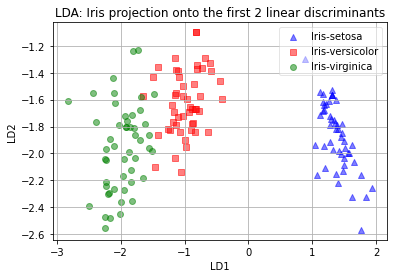

In [ ]:
from matplotlib import pyplot as plt


ax = plt.subplot(111)
for label,marker,color in zip(
    range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

    plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

plt.xlabel('LD1')
plt.ylabel('LD2')

leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title('LDA: Iris projection onto the first 2 linear discriminants')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Train kümesinde {} örnek var test kümesinde {} örnek var'.format(X_train.shape[0], X_test.shape[0]))


Train kümesinde 120 örnek var test kümesinde 30 örnek var


* *Dependent variable*: Problemde tahmin etmek istediğimiz ana değişkendir.
* *Independent variable*: Bağımlı değişkeni tahmin etmemize yardımcı olan değişkendir.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

iris_df = pd.read_csv(url, names=cls)

iris_df.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris_df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
iris_df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from sklearn.preprocessing import LabelEncoder

X_iris = iris_df.iloc[:, 0:4].values
y_iris = iris_df['class'].values
encoder = LabelEncoder()
labelencoder = encoder.fit(y_iris)
y_iris = label_encoder.transform(y_iris) + 1

label_dict_iris = {1: 'Iris-setosa', 2: 'Iris-versicolor', 3:'Iris-virginica'}

# Train/Test olarak veri setimi ayırma
Örneklem dışı doğruluk (Out of Sample Accuracy), modelin test verilerinin üzerinde yaptığı doğru tahminlerin yüzdesidir. Aynı veri üzerinden test ve train kümelerini birbirini dışlamadan bölmek aşırı uydurmaya (overfitting) sebep olur. Dışlamadan hazırlanan verinin örneklem dışı doğruluğu %100 civarında olur, aksi durumun en kabul edilebilir değeri %70 civarıdır. 

test_size=0.2, veri setini %20 test %80 modeli eğitmek için ayırır. 

random_state=4 olduğunda veri seti benzersiz bir şekilde rastgele ayrılır. Eğer random_state=5 olduğunda bir öncekinden farklı 5'e özgü şekilde rastgele ayrılır. Bu, veri kümesinin rastgele bölünmesinin istikrarlı ve kontrol edilebilir hale gelmesini sağlar.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing

X_lda = preprocessing.StandardScaler().fit(X_iris).transform(X_iris.astype(float))
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split( X_lda, y, test_size=0.2, random_state=4)

lda_1 = LDA()
lda_1.fit(X_train_lda, y_train_lda)
yhat = lda_1.predict(X_test_lda)

## Modelimiz tahminlerde ne kadar başarılı?

* Sınıflandırmada <font color = red>doğruluk sınıflandırma puanı (accuracy_score)</font>, alt küme doğruluğunu hesaplayan bir fonksiyondur. Bu işlev, <font color = red>jaccard_score</font> işlevine eşittir. İki kümenin benzerlik oranını ölçmek için kullanılan bir metriktir.

* <font color = red>Karışıklık matrisi (Confusion matrix)</font>, doğru tahminler (True Positive) ve yanlış tahminler (False Positive) bulundurur. Örneğin aşağıda 3 etiketli sınıf, test verisi içerisinden 0 tanesinde 1 sınıfı olarak yanlış tahmin edildi, 0 tanesinde 2 etiketli sınıf olarak yanlış tahmin edildi, 8 tanesinde 3 etiketli sınıf olarak doğru tahmin edildi.


* <font color = red>Kesinlik (precision)</font>, bir sınıflandırma modelinin doğru olarak sınıflandırdığı pozitif örneklerin toplam pozitif örneklerin sayısına oranıdır. 

      precision = TP / (TP + FP)

* <font color = red>Duyarlılık (recall)</font>, bir sınıflandırma modelinin doğru olarak sınıflandırdığı negatif örneklerin toplam negatif örneklerin sayısına oranıdır. 

      recall = TN / (TN + FN)


* <font color = red>F1 Skor (F1 Score)</font>, bir performans metriğidir ve bir sınıflandırma modelinin doğruluk ve duyarlılığının birleştirilmiş bir ölçüsü olarak kullanılır. 

      F1 = 2 * (accuracy * recall) / (accuracy + recall)
* <font color = red>Destek (support)</font>, test veri setinde o sınıftan kaç tane bulunduğunu gösterir. 

Bu değerler, modelin başarısını değerlendirmede kullanılabilecek önemli ipuçları sağlar. Uygulandığı duruma göre farklı anlamdırılır.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.80      0.80      0.80         5
           3       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30



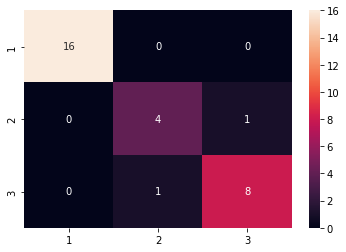

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

classes_names = ['1','2','3']
cm = pd.DataFrame(confusion_matrix(y_test_lda, yhat), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test_lda, yhat))


# **K-Nearest Neighbors**

**k-NN** olarak da bilinen **k-en yakın komşu** algoritması, bireysel bir veri noktasının gruplandırılması hakkında sınıflandırmalar veya tahminler yapmak için **yakınlığı** kullanan, **denetimli (supervised)** bir öğrenme sınıflandırıcısıdır.


Algoritmanın amacı bir veri noktasının sınıfını tahmin etmektir. Tahmin işlemini en yakın veri noktalarının çoğunluğunun ait olduğu sınıfı seçerek sağlar. 


 Aşağıdaki grafikte birtakım veriler ve sahip oldukları <font color = yellow> A </font> ve <font color = purple> B </font> sınıfları bulunuyor. Yıldız yeni veri noktasını temsil etmektedir. Algoritmanın isminde de yer alan k değeri, veriye en yakın k tane noktayı gösterir. k=3 için yıldızımız <font color = purple> B </font> sınıfı tahmin elde ederiz, k = 6 için <font color = yellow> A </font> sınıfı tahmin elde ederiz.


#### K-En Yakın Komşu algoritmasının görselleştirmesi

<img src="https://i.hizliresim.com/2tlip6g.png" width = "500" >


### Algoritmadaki problemler:

<ol>
<li>k'nın en iyi değerinin seçimi</a></li>
<li>Yeni veri noktası ile komşu veri noktalarının arasındaki benzerlik için kullanılacak mesafelerin nasıl hesaplanacağı</a></li>
</ol>

<hr>

Bilinmeyen vakaların sınıfını tahmin etmek için bir sınıflandırıcı oluşturulur. K en yakın komşu adı verilen makine öğrenme metodu ile LDA ile boyut azaltarak modelimizi iyileştireceğiz.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

iris_df_knn_lda_1 = pd.read_csv(url, names=cls)
X_iris_knn_lda_1 = iris_df_knn_lda_1.iloc[:, 0:4].values
y_iris_knn_lda_1 = iris_df_knn_lda_1['class'].values
encoder = LabelEncoder()
labelencoder = encoder.fit(y_iris_knn_lda_1)
y_iris_knn_lda_1 = label_encoder.transform(y_iris_knn_lda_1) + 1

label_dict_iris_knn = {1: 'Iris-setosa', 2: 'Iris-versicolor', 3:'Iris-virginica'}

## Normalize Etme

#### kNN algoritmasındaki 2. problemi bu kısımda çözüyoruz. İki nokta arasındaki uzaklığı (benzerliği) Öklid kuralıyla buluruz. Örneğin, iki müşterinin yaşları arasındaki benzerlik.<br>

$D(t,k) = \sqrt[2]{(t_1 - k_1)^2}\;\;\;\;\;\;\;\;\;\;\;\; D(t,k) = \sqrt[p]{(t_1 - k_1)^p + (t_2 - k_2)^p + ... + (t_n - k_n)^p}$ <br>

#### Birden fazla özelliğimiz olduğundan dolayı doğru benzerlik ölçüsünü bulmak için verileri normalize etmemiz gerekiyor. Veri Standardizasyonu, fit fonksiyonu yardımıyla verilere ortalama ve standart sapma arasında değer verir.


In [ ]:
X_lda_knn_1 = preprocessing.StandardScaler().fit(X_iris_knn_lda_1).transform(X_iris_knn_lda_1.astype(float))


In [ ]:
X_train_knn_lda_1, X_test_knn_lda_1, y_train_knn_lda_1, y_test_knn_lda_1 = train_test_split( X_lda_knn_1, y_iris_knn_lda_1, test_size=0.2, random_state=4)


## Geçici k değeri atama
Şimdilik k değerini 3 kabul edelim ve modeli eğitelim, birazdan en iyi k değerini bulacağız.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 3

neigh_1 = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn_lda_1,y_train_knn_lda_1)

## Tahmin

Şimdi modeli test üzerinden hangi sınıfa ait olduğunu tahmin etmesi için kullanıyoruz.


              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.67      0.80      0.73         5
           3       0.89      0.89      0.89         9

    accuracy                           0.90        30
   macro avg       0.85      0.88      0.86        30
weighted avg       0.91      0.90      0.90        30



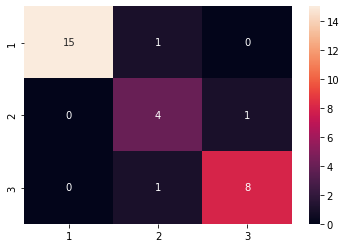

In [ ]:
yhat_knn_lda_1 = neigh_1.predict(X_test_knn_lda_1)
classes_names = ['1','2','3']
cm = pd.DataFrame(confusion_matrix(y_test_knn_lda_1, yhat_knn_lda_1), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test_knn_lda_1, yhat_knn_lda_1))

## En iyi k değerini bularak yukarıdaki değerleri iyileştirelim

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

iris_df_knn_lda_2 = pd.read_csv(url, names=cls)
X_iris_knn_lda_2 = iris_df_knn_lda_2.iloc[:, 0:4].values
y_iris_knn_lda_2 = iris_df_knn_lda_2['class'].values
encoder = LabelEncoder()
labelencoder = encoder.fit(y_iris_knn_lda_2)
y_iris_knn_lda_2 = labelencoder.transform(y_iris_knn_lda_2) + 1

label_dict_iris_knn = {1: 'Iris-setosa', 2: 'Iris-versicolor', 3:'Iris-virginica'}

In [ ]:
X_lda_knn_2 = preprocessing.StandardScaler().fit(X_iris_knn_lda_2).transform(X_iris_knn_lda_2.astype(float))
X_train_knn_lda_2, X_test_knn_lda_2, y_train_knn_lda_2, y_test_knn_lda_2 = train_test_split( X_lda_knn_2, y_iris_knn_lda_2, test_size=0.2, random_state=4)

Standart sapması, veri kümesindeki değerler arasındaki varyansı gösterir. Bu, veriler arasındaki dağılımı ve benzerliklerini belirler. Bu nedenle, standart sapması, en iyi k değerini bulma sürecinde dikkate alınır, çünkü bu değerin düşük olması algoritmanın daha hassas ve doğru sonuç vereceğini gösterir.

In [ ]:
from sklearn import metrics
Ks = 12
ks_acc = np.zeros((Ks-1))
ks_std_acc = np.zeros((Ks-1))
for n in range(1,Ks): 
    neigh_2 = KNeighborsClassifier(n_neighbors = n).fit(X_train_knn_lda_2,y_train_knn_lda_2)
    yhat_knn_lda_2=neigh_2.predict(X_test_knn_lda_2)
    ks_acc[n-1] = metrics.accuracy_score(y_test_knn_lda_2, yhat_knn_lda_2)
    ks_std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
ks_acc

array([0.9   , 0.9333, 0.9   , 0.9333, 0.9333, 0.9333, 0.9333, 0.9333,
       0.9333, 0.9333, 0.9333])

#### k değerlerinin accuracy değerleriyle birlikte görselleştirelim

En iyi k değeri bulunurken gayet basit mantıkla belli bir değere kadar olan k değerleri için jaccard skoruna bakılır ve en iyi accuracy değerine sahip k değeri kullanılır. ks_acc, k değerlerinin accuracy değerleri. ks_std_acc, standart sapma değerleri.


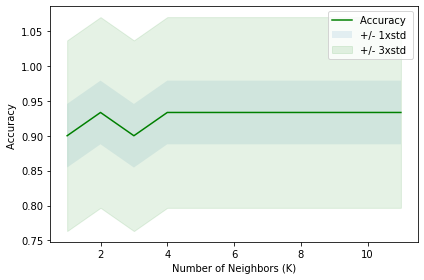

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),ks_acc,'g')
plt.fill_between(range(1,Ks),ks_acc - 1 * ks_std_acc,ks_acc + 1 * ks_std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),ks_acc - 3 * ks_std_acc,ks_acc + 3 * ks_std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", ks_acc.max(), "with k=", ks_acc.argmax()+1) 

The best accuracy was with 0.9333333333333333 with k= 2


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.80      0.80      0.80         5
           3       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30



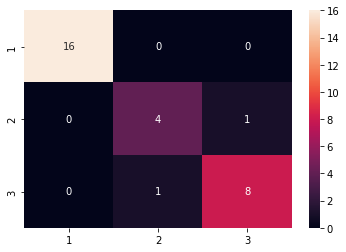

In [ ]:
classes_names = ['1','2','3']
cm = pd.DataFrame(confusion_matrix(y_test_knn_lda_2, yhat_knn_lda_2), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test_knn_lda_2, yhat_knn_lda_2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.80      0.89         5
           3       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



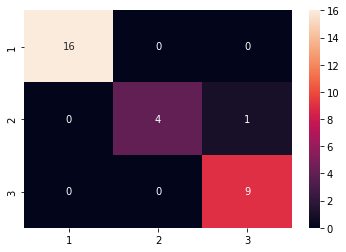

In [ ]:
#KNN+LDA
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

iris_df_knn_lda_3 = pd.read_csv(url, names=cls)
X_iris_knn_lda_3 = iris_df_knn_lda_3.iloc[:, 0:4].values
y_iris_knn_lda_3 = iris_df_knn_lda_3['class'].values
encoder = LabelEncoder()
labelencoder = encoder.fit(y_iris_knn_lda_3)
y_iris_knn_lda_3 = labelencoder.transform(y_iris_knn_lda_3) + 1

label_dict_iris_knn = {1: 'Iris-setosa', 2: 'Iris-versicolor', 3:'Iris-virginica'}
X_lda_knn_3 = preprocessing.StandardScaler().fit(X_iris_knn_lda_3).transform(X_iris_knn_lda_3.astype(float))
X_train_knn_lda_3, X_test_knn_lda_3, y_train_knn_lda_3, y_test_knn_lda_3 = train_test_split( X_lda_knn_3, y_iris_knn_lda_3, test_size=0.2, random_state=4)
lda_3 = LDA()
X_train_knn_lda_3 = lda_3.fit_transform(X_train_knn_lda_3,y_train_knn_lda_3)
X_test_knn_lda_3 = lda_3.transform(X_test_knn_lda_3)

neigh_2 = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn_lda_3,y_train_knn_lda_3)
yhat_knn_lda_3 =neigh_2.predict(X_test_knn_lda_3)

classes_names = ['1','2','3']
cm = pd.DataFrame(confusion_matrix(y_test_knn_lda_3, yhat_knn_lda_3), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test_knn_lda_3, yhat_knn_lda_3))


# Referanslar

https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/ </br>
https://rpubs.com/ZheWangDataAnalytics/LDA  </br>
https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202  </br>
https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28  </br>
https://shuzhanfan.github.io/2018/07/understanding-mathematics-behind-lda/